C:\Users\james\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0,0.5,'Occurrences')

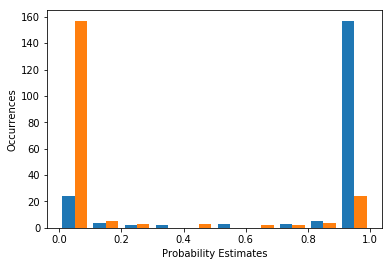

In [71]:
#1 a)
#i)
import numpy as np

positive_class = np.random.normal(0,1,1000)
negative_class = np.random.normal(5,1,1000)
X_train = np.concatenate((positive_class, negative_class)).reshape(-1,1)
# 0~postive class & 1~negative class
y_train = np.concatenate((np.zeros(1000), np.ones(1000)))

#ii)
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression().fit(X_train,y_train)
#After experimenting with the parameters I found that class_weight and penalty have the largest impact on results

#iii)
X_test = np.concatenate((np.random.normal(0,1,100),np.random.normal(0,5,100))).reshape(-1,1)
probs = lm.predict_proba(X_test)

import matplotlib.pyplot as plt

plt.hist(probs)
plt.xlabel("Probability Estimates")
plt.ylabel("Occurrences")

#iv)
#The classifier preforms quite well on the test set with a the probabilities of a correct - 
#classification being eight times higher than an incorrect classification.

iv) 

Text(0,0.5,'Occurrences')

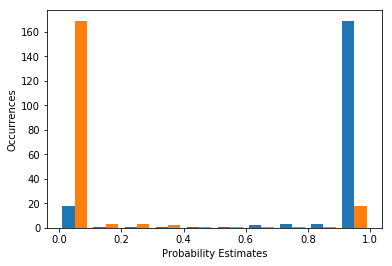

In [132]:
#b)
#i)
nb_positive_class = np.random.normal(0,1,2)
nb_positive_class = nb_positive_class.reshape(1,2)
for i in range(1,1000):
    nb_positive_class = np.concatenate((nb_positive_class, np.random.normal(0,1,2).reshape(1,2)))

nb_negative_class = np.random.normal(5,1,2)
nb_negative_class = nb_negative_class.reshape(1,2)
for i in range(1,1000):
    nb_negative_class = np.concatenate((nb_negative_class, np.random.normal(5,1,2).reshape(1,2)))
    
nb_X_train = np.concatenate((nb_positive_class, nb_negative_class)).reshape(-1,1)
# 0~postive class & 1~negative class
nb_y_train = np.concatenate((np.zeros(2000), np.ones(2000)))

#ii)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(nb_X_train,nb_y_train)
#i had trouble experimenting with priors but found the var_smoothing didn't have a large impact on results.

#iii)
nb_X_test = np.concatenate((np.random.normal(0,1,100),np.random.normal(0,5,100))).reshape(-1,1)
probs = lm.predict_proba(nb_X_test)

import matplotlib.pyplot as plt

plt.hist(probs)
plt.xlabel("Probability Estimates")
plt.ylabel("Occurrences")

#iv)
#The classifier preforms about the same as the previous KMeans classifier as it -
#predicts the correct cluster eight times more often than incorrect.

iv)

In [133]:
#2
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('C:/Users/james/OneDrive/Documents/Current/CSCI3151/mouse.csv', sep=" ", header=None)
mouse_X = df[[0,1]] 
mouse_y = df[[2]]
mouse_X_train, mouse_X_test, mouse_y_train, mouse_y_test = train_test_split(mouse_X,mouse_y)
le = preprocessing.LabelEncoder()
mouse_y_train = le.fit_transform(mouse_y_train)
mouse_y_test = le.fit_transform(mouse_y_test)

#a)
cl = KMeans().fit(mouse_X_train,mouse_y_train)
clust = cl.predict(mouse_X_test)
print(clust)

#b)
gmm = GaussianMixture(init_params='random').fit(mouse_X_train,mouse_y_train)
g_clust = gmm.predict(mouse_X_test)
print(g_clust)

[2 0 2 5 3 5 5 5 1 3 0 0 5 0 7 0 7 1 4 0 5 3 3 1 5 1 3 2 5 3 0 5 3 3 3 3 3
 0 0 3 6 3 3 3 4 3 3 0 0 2 0 1 1 4 6 4 5 6 0 6 1 4 4 6 7 4 5 5 5 5 3 1 7 1
 0 3 1 1 2 0 5 0 5 0 2 3 4 3 6 7 5 1 3 4 4 3 5 0 3 5 0 3 0 5 4 5 0 3 0 3 0
 0 3 0 3 1 5 3 0 2 0 3 0 3 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\james\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#3  
a)  
  * i) If X and Y are independent, $p(X,Y)=p(X)p(Y)$ so $I(X;Y)=\sum_{x}\sum_{y}p(X)P(Y)log(1)$ and since $log(1)=0$, $I(X;Y)=0$  
  * ii) If X and Y are mutually exclusive then $p(X,Y)=0$ so $I(X;Y)=\sum_{x}p(X)log(p(X))+\sum_{y}p(Y)log(p(Y))$  
  * iii)  
  * iv)  
      * $I(X;Y)=H(X)-H(X|Y)$  
      * $I(X;Y)=-\sum_{x}p(x)log(p(x))+\sum_{x}\sum_{y}p(y)p(x|y)log(p(x|y))$  
      * $I(X;Y)=-\sum_{x}\sum_{y}p(x,y)log(p(x))+\sum_{x}\sum_{y}p(x,y)log(p(x,y)/p(x))$  
      * $I(X;Y)=\sum_{x}\sum_{y}p(x,y)log(p(x,y)/p(x)p(y))$  
      * $I(X;Y)=I(X;Y)$  
H(Y|X=x) is the amount of information needed to describe Y given that X is equal to x, while H(X|Y) is the amount of information needed to describe X given Y is known.  
  * v) Since clusters($\omega$) and classes(c) are discrete Random Variables the equation for MI on page 84 can be expressed as $I(\Omega,C)=\sum_{k}\sum_{j}p(\omega_{k},C_{j})log(p(\omega_{k},C_{j})/p(\omega_{k})p(C_{j}))$ which is literally the same equation used above but with clusters and classes instead of X and Y. It is still represents the given information using joint entropy.  
b)  
i) If the clusters perfectly match the classes then Purity is simply the sum of the number of documents in each class divided by the total number of documents, therefore $Purity=N/N=1$ or 100% purity. The Rand Index is similar because the false negative, and false positive will both be zero, leaving $RI=(TP+TN)/(TP+TN)$  
ii)  


In [70]:
#c)
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

matrix = metrics.cluster.contingency_matrix(mouse_y_test, clust)
print("Purity, Rand Index, and NMI for KMeans:")
print(np.sum(np.amax(matrix, axis=0)) / np.sum(matrix))
print(adjusted_rand_score(mouse_y_test, clust))
print(adjusted_mutual_info_score(mouse_y_test, clust))

matrix = metrics.cluster.contingency_matrix(mouse_y_test, g_clust)
print("\nPurity, Rand Index, and NMI for EM:")
print(np.sum(np.amax(matrix, axis=0)) / np.sum(matrix))
print(metrics.cluster.adjusted_rand_score(mouse_y_test, g_clust))
print(adjusted_mutual_info_score(mouse_y_test, g_clust))

Purity, Rand Index, and NMI for KMeans:
0.96
0.36708561740452117
0.4565126335537493

Purity, Rand Index, and NMI for EM:
0.552
0.0
1.2372237388894824e-15
